In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('../data/onehot.csv')

df.drop('Name', axis=1, inplace=True)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

In [86]:
X_train.shape

(770, 1672)

In [87]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [88]:
X_trainC, X_testC, y_trainC, y_testC= X_train, X_test, y_train, y_test

## SVM without PCA

In [89]:
accuracy_score(y_test, y_pred)

0.9454545454545454

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       163
           1       0.99      0.90      0.94       167

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [91]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [92]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## SVM with PCA

In [93]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [94]:
# print the PCA components
print(pca.fit(X_train))

PCA()


In [95]:
# print the PCA transformation matrix
print(pca.components_.shape)
print(pca.components_)

(770, 1672)
[[ 2.65166343e-02  2.56355836e-02  1.57376489e-02 ...  6.65511920e-04
  -6.19468131e-04 -6.19468131e-04]
 [ 6.55001051e-02  4.67997815e-02  7.89936759e-02 ...  5.91084789e-03
  -1.07096051e-03 -1.07096051e-03]
 [-1.99358967e-03 -3.61187167e-04  8.12864257e-04 ... -5.17531118e-04
  -4.34785931e-04 -4.34785931e-04]
 ...
 [-5.70809625e-16 -2.72666402e-17 -1.38492363e-16 ...  1.16891057e-02
  -8.61054234e-04  6.09579298e-03]
 [ 3.75218049e-16  6.89841746e-17  1.15723338e-15 ...  1.20684293e-02
  -5.34077838e-03  3.41475519e-03]
 [-2.65534018e-16  1.49354456e-16 -6.15901057e-16 ...  7.09067476e-04
   2.68207768e-03  3.47960550e-03]]


In [96]:
# print the shape of the data before and after PCA
print(X_train.shape)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)

(770, 1672)
(770, 770)


In [97]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [98]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=47)

In [99]:
y_pred = svm.predict(X_test)

accuracy_score(y_test, y_pred)

0.9151515151515152

In [100]:
pca.explained_variance_ratio_

array([2.72328363e-02, 1.99242664e-02, 1.79125666e-02, 1.76200673e-02,
       1.68628323e-02, 1.48965175e-02, 1.42386093e-02, 1.20075519e-02,
       1.11665797e-02, 1.08285307e-02, 1.02274047e-02, 9.97954688e-03,
       9.76348446e-03, 9.19013573e-03, 8.98552367e-03, 8.90393441e-03,
       8.73656942e-03, 8.57641336e-03, 8.01632097e-03, 7.86421592e-03,
       7.74739494e-03, 7.58098084e-03, 7.32103376e-03, 7.31716970e-03,
       7.24868111e-03, 7.07115396e-03, 6.86749772e-03, 6.79959000e-03,
       6.62554066e-03, 6.54431373e-03, 6.45310461e-03, 6.26680558e-03,
       6.17973595e-03, 6.15402433e-03, 6.03144341e-03, 5.86803428e-03,
       5.77325868e-03, 5.72443094e-03, 5.62519114e-03, 5.42817515e-03,
       5.35614801e-03, 5.26483631e-03, 5.19636176e-03, 5.09256635e-03,
       5.01013597e-03, 4.91560037e-03, 4.88961152e-03, 4.80126079e-03,
       4.71506992e-03, 4.67101592e-03, 4.65714423e-03, 4.53270535e-03,
       4.48032203e-03, 4.41996899e-03, 4.39375766e-03, 4.28294516e-03,
      

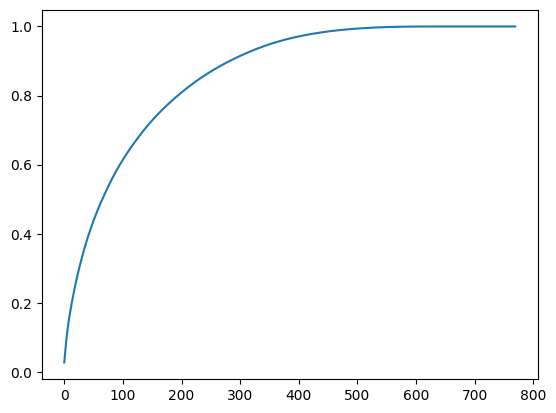

In [101]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [102]:
X_train, X_test, y_train, y_test = X_trainC, X_testC, y_trainC, y_testC

### Effect of number of components

In [108]:
# plotting for number of components vs accuracy
accuracies = []

for num_components in range(1, 1000):
    X_train, X_test, y_train, y_test = X_trainC, X_testC, y_trainC, y_testC
    pca = PCA(n_components=num_components)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


ValueError: n_components=771 must be between 0 and min(n_samples, n_features)=770 with svd_solver='full'

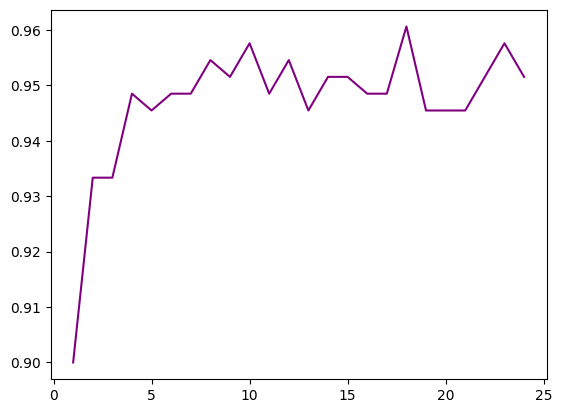

In [107]:
# change color to purple
plt.plot(range(1, 25), accuracies, color='purple')

In [106]:
pca.explained_variance_

array([1.48619613, 0.61427473, 0.40576596, 0.3581045 , 0.32281878,
       0.26487931, 0.23108398, 0.21506946, 0.19976505, 0.17570005,
       0.17195043, 0.1642068 , 0.1548568 , 0.15036435, 0.14968298,
       0.13828645, 0.13482655, 0.13390612, 0.12745692, 0.12669842,
       0.12207153, 0.12055291, 0.1174182 , 0.11540231])